In [ ]:
import pandas as pd

path_to_file = '/content/drive/MyDrive/age_gender.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path_to_file)



print(df.head())

   age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3  193 197 198 200 199 200 202 203 204 205 208 21...  
4  202 205 209 210 209 209 210 211 212 214 218 21...  


In [ ]:
import pandas as pd


std_dev = df['age'].std()
mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].median()

# Print the mean
print("Mean:", mean) 

print("median",median) 
print("mode",mode)
# Print the standard deviation
print("Standard Deviation:", std_dev)

Mean: 33.30090698164944
median 29.0
mode 29.0
Standard Deviation: 19.88570810172171


In [ ]:
import pandas as pd
from scipy import stats

# Calculate the z-score using scipy
z_scores = stats.zscore(df['age'])

# Print the z-scores
print("Z-Scores:", z_scores)

Z-Scores: 0       -1.624362
1       -1.624362
2       -1.624362
3       -1.624362
4       -1.624362
           ...   
23700    3.303904
23701    3.303904
23702    3.303904
23703    3.303904
23704    3.303904
Name: age, Length: 23705, dtype: float64


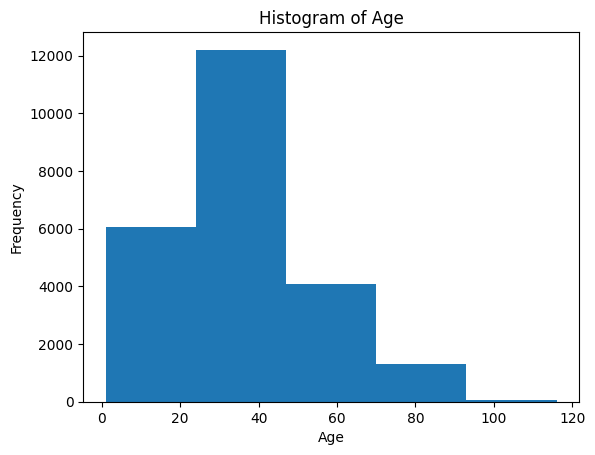

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=5)  

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.savefig('histogram.png', dpi=300)  # Specify the file name and DPI (optional)

# Display the histogram
plt.show()

In [ ]:
plt.savefig('histogram.png', dpi=300)  # Specify the file name and DPI (optional)


<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.base import MIMEBase
from email import encoders
import datetime

today = datetime.date.today()

# Convert date to string format
subject = today.strftime("%d-%m-%Y")
now = datetime.datetime.now()

# Convert date and time to string format

# Email configuration
sender_email = 'ahanafshahriar0@gmail.com'
sender_password = ''
receiver_email = 'almehady@gmail.com'
bcc_email = 'ahanafshahriar02@gmail.com'
subject =   "histogram Report for " + today.strftime("%d-%m-%y") 
message = '''
Dear Sir,

Please find the dataset attached.

Your sincerely,
Ahanaf Shahriar
''' + now.strftime("%d-%m-%Y %H:%M:%S")

# Create the email message
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Bcc'] = bcc_email
msg['Subject'] = subject
msg.attach(MIMEText(message, 'plain'))

# Attach the dataset file
dataset_filename = '/content/sample_data/california_housing_train.csv'
with open('histogram.png', 'rb') as file:
    image = MIMEImage(file.read(), name='histogram.png')
    msg.attach(image)

with open(dataset_filename, 'rb') as file:
    dataset_part = MIMEBase('application', 'octet-stream')
    dataset_part.set_payload(file.read())
    encoders.encode_base64(dataset_part)
    dataset_part.add_header('Content-Disposition', f'attachment; filename="{dataset_filename}"')
    msg.attach(dataset_part)

# Connect to the SMTP server and send the email
with smtplib.SMTP(host='smtp.gmail.com', port=587) as server:
    server.starttls()
    server.login(sender_email, sender_password)
    server.send_message(msg)

print('Email sent successfully!')

Email sent successfully!
